In [27]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import glob, os, pickle, json, sys
import tables
from ctapipe.io import read_table
from astropy.coordinates import SkyCoord
import astropy.units as u
import subprocess

sys.path.insert(0, os.getcwd() + "/../scripts/")
import plotting

# DL1 reading for run 3318

In [26]:
run_number  = 3318

# DATACHECK FILE FOR RUN 3318
dcheck_files = np.sort(glob.glob("/fefs/aswg/data/real/DL1/2020????/v0.9/tailcut84/dl1_LST-1.Run03???.h5"))

runs = np.array([int(f.split(".")[-2:-1][0][3:]) for f in dcheck_files])

len(dcheck_files)

142

# Reading the binning and elapsed time

In [21]:
bins = np.logspace(-5.3, -1.5, 150)
bin_c = (bins[1:] * bins[:-1])**0.5

counts = []
efftimes = []
for i, d in enumerate(dcheck_files):
    tab = tables.open_file(d)
    t = tab.root.dl1.event.telescope.parameters.LST_LSTCam.col("dragon_time")
    c, _ = np.histogram(np.diff(t), bins)
    efftimes.append(t[-1] - t[0])
    counts.append(c)
    print(f"Opening... {i}/{len(dcheck_files)} {d}")

Opening... 0/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03000.h5 - deadtime -1.00e+00
Opening... 1/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03001.h5 - deadtime -1.00e+00
Opening... 2/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03002.h5 - deadtime 7.63e-06
Opening... 3/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03003.h5 - deadtime 7.63e-06
Opening... 4/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03004.h5 - deadtime -1.00e+00
Opening... 5/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03005.h5 - deadtime -1.00e+00
Opening... 6/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03006.h5 - deadtime -1.00e+00
Opening... 7/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03007.h5 - deadtime -1.00e+00
Opening... 8/142 /fefs/aswg/data/real/DL1/20201122/v0.9/tailcut84/dl1_LST-1.Run03008.h5 - deadtime -1.00e+00
Opening... 9/142 /fef

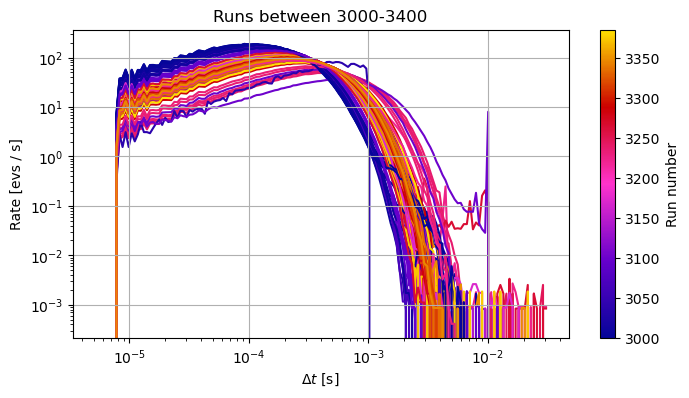

In [39]:
fig, ax = plt.subplots(figsize=(8,4))

colors = plotting.get_colors_multiplot(runs)

for i, t, tt in zip(range(len(runs)), counts, efftimes):
    ax.plot(bin_c, t/tt, color=colors[i], zorder=np.random.rand())
plt.loglog()
cmap = plotting.create_cmap_from_colors(plotting.default_colors)
plotting.plot_colorbar(fig, ax, runs, cmap=cmap, label="Run number")

ax.set_xlabel("$\Delta t$ [s]")
ax.set_ylabel("Rate [evs / s]")
ax.set_title("Runs between 3000-3400")
ax.grid()

plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()